In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from api_keys import api_key
from pprint import pprint



In [2]:
# Extract api data for the state of Oregon

# Set base url
url = "https://api.usa.gov/crime/fbi/cde/"
# Set state name
state = "OR"
# Create list of years
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
# Set criminal offense type
offense_type = "all"

# Make empty list to save data to
oregon_data = []

# Loop through list of years  
for year in years:
        
        
        state_url = f"{url}arrest/state/{state}/{offense_type}?from={year}&to={year}&API_KEY={api_key}"
           
        response = requests.get(state_url)
        # Convert to json
        crime_data = response.json()
        
        
        
        agg_assault = crime_data["data"][0]["Aggravated Assault"]
        all_other = crime_data["data"][0]["All Other Offenses (Except Traffic)"]
        arson = crime_data["data"][0]["Arson"]
        burglary = crime_data["data"][0]["Burglary"]
        curfew = crime_data["data"][0]["Curfew and Loitering Law Violations"]
        disorderly = crime_data["data"][0]["Disorderly Conduct"]
        dui = crime_data["data"][0]["Driving Under the Influence"]
        drug_abuse = crime_data["data"][0]["Drug Abuse Violations - Grand Total"]
        drunkenness = crime_data["data"][0]["Drunkenness"]
        embezzlement = crime_data["data"][0]["Embezzlement"]
        forgery = crime_data["data"][0]["Forgery and Counterfeiting"]
        fraud = crime_data["data"][0]["Fraud"]
        gambling = crime_data["data"][0]["Gambling - Total"]        
        trafficking1 = crime_data["data"][0]["Human Trafficking - Commercial Sex Acts"]
        traffiking2 = crime_data["data"][0]["Human Trafficking - Involuntary Servitude"]
        theft = crime_data["data"][0]["Larceny - Theft"]
        liquor = crime_data["data"][0]["Liquor Laws"]
        manslaughter = crime_data["data"][0]["Manslaughter by Negligence"]
        vehicle_theft = crime_data["data"][0]["Motor Vehicle Theft"] 
        murder = crime_data["data"][0]["Murder and Nonnegligent Manslaughter"]
        fam_and_children = crime_data["data"][0]["Offenses Against the Family and Children"]
        vice = crime_data["data"][0]["Prostitution and Commercialized Vice"]
        rape = crime_data["data"][0]["Rape"]
        robbery = crime_data["data"][0]["Robbery"]
        sex_offenses = crime_data["data"][0]["Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"]
        assault = crime_data["data"][0]["Simple Assault"]
        stolen_property = crime_data["data"][0]["Stolen Property: Buying, Receiving, Possessing"]
        suspicion = crime_data["data"][0]["Suspicion"]
        vagrancy = crime_data["data"][0]["Vagrancy"]
        vandalism = crime_data["data"][0]["Vandalism"]
        weapons = crime_data["data"][0]["Weapons: Carrying, Possessing, Etc."]              
        year = crime_data["data"][0]["data_year"]
        
        state_name = state
        
        
        oregon_data.append({
            "Year": year,
            "State": state_name,
            "Aggravated Assault": agg_assault,
            "All Other Offenses (except traffic)": all_other,
            "Arson": arson,
            "Burglary": burglary,
            "Curfew and Loitering Law Violations": curfew,
            "Disorderly Conduct": disorderly,
            "Driving Under the Influence": dui,
            "Drug Abuse Violations": drug_abuse,
            "Drunkenness": drunkenness,
            "Embezzlement": embezzlement,
            "Forgery and Counterfeiting": forgery,
            "Fraud": fraud,
            "Gambling": gambling,        
            "Human Trafficking - Commercial Sex Acts": trafficking1,
            "Human Trafficking - Involuntary Servitude": traffiking2,
            "Larceny - Theft": theft,
            "Liquor Laws": liquor,
            "Manslaughter by Negligence": manslaughter,
            "Motor Vehicle Theft": vehicle_theft, 
            "Murder and Nonnegligent Manslaughter": murder,
            "Offenses Against the Family and Children": fam_and_children,
            "Prostitution and Commercialized Vice": vice,
            "Rape": rape,
            "Robbery": robbery,
            "Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)": sex_offenses,
            "Simple Assault": assault,
            "Stolen Property: Buying, Receiving, Possessing": stolen_property,
            "Suspicion": suspicion,
            "Vagrancy": vagrancy,
            "Vandalism": vandalism,
            "Weapons: Carrying, Possessing, Etc.": weapons            
            
        })
    

In [3]:
# Convert to Dataframe
oregon_data_df = pd.DataFrame(oregon_data)

oregon_data_df

,Year,State,Aggravated Assault,All Other Offenses (except traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations,...,Prostitution and Commercialized Vice,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc."
0,2011,OR,3064,20733,264,2578,852,10230,15013,19342,...,376,229,938,1148,13587,409,0,0,4660,1747
1,2012,OR,2895,19739,260,2624,1156,10458,14316,19936,...,450,225,1152,1162,13265,519,0,11,4285,1767
2,2013,OR,1298,10180,106,1024,411,3499,7059,10687,...,49,75,295,330,5171,299,0,1,2161,884
3,2014,OR,1992,15471,139,1415,526,6215,8535,14398,...,244,141,626,597,7863,381,0,2,2745,1426
4,2015,OR,2329,19232,169,1554,494,5953,10496,13007,...,137,136,517,545,7889,446,0,1,2932,1438
5,2016,OR,2951,49717,228,1816,535,7012,14939,14824,...,264,162,846,546,10720,600,0,5,4208,1836
6,2017,OR,2896,45377,225,1529,500,6803,14121,16230,...,312,207,749,461,10569,626,0,22,4095,2170
7,2018,OR,3554,49933,301,1981,361,7021,14549,15731,...,252,281,913,414,11734,676,0,3,4054,2440
8,2019,OR,3938,50948,314,2039,289,7617,13522,14999,...,140,298,899,505,11810,620,0,2,4047,2381
9,2020,OR,3655,33166,423,2152,200,5955,9950,9088,...,47,203,914,324,9968,598,0,13,3837,2105


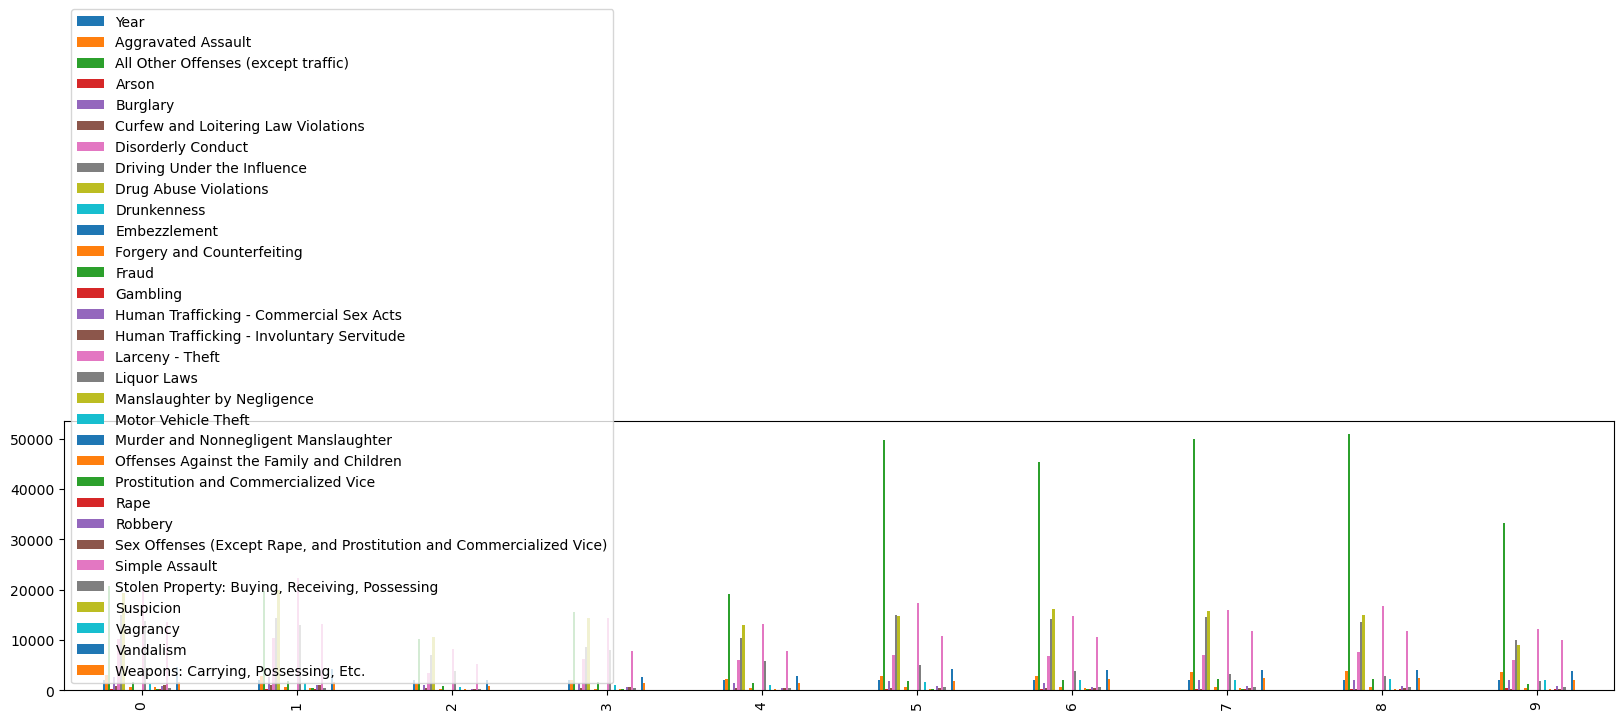

<Figure size 640x480 with 0 Axes>

In [5]:


#Produce scatter plot
# Filter the DataFrame down only to those columns to chart
oregon_data_df.plot(kind="bar", figsize=(20,3.5))
plt.show()
plt.tight_layout()

In [4]:
oregon_data_df.to_csv("Data/oregon_data.csv")

In [5]:
# Extract api data for the state of Washington

# Set base url
url = "https://api.usa.gov/crime/fbi/cde/"
# Set state name
state = "WA"
# Create list of years
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
# Set criminal offense type
offense_type = "all"

# Make empty list to save data to
washington_data = []

# Loop through list of years  
for year in years:
        
    
        state_url = f"{url}arrest/state/{state}/{offense_type}?from={year}&to={year}&API_KEY={api_key}"
           
        response = requests.get(state_url)
        # Convert to json
        crime_data = response.json()
    
        agg_assault = crime_data["data"][0]["Aggravated Assault"]
        all_other = crime_data["data"][0]["All Other Offenses (Except Traffic)"]
        arson = crime_data["data"][0]["Arson"]
        burglary = crime_data["data"][0]["Burglary"]
        curfew = crime_data["data"][0]["Curfew and Loitering Law Violations"]
        disorderly = crime_data["data"][0]["Disorderly Conduct"]
        dui = crime_data["data"][0]["Driving Under the Influence"]
        drug_abuse = crime_data["data"][0]["Drug Abuse Violations - Grand Total"]
        drunkenness = crime_data["data"][0]["Drunkenness"]
        embezzlement = crime_data["data"][0]["Embezzlement"]
        forgery = crime_data["data"][0]["Forgery and Counterfeiting"]
        fraud = crime_data["data"][0]["Fraud"]
        gambling = crime_data["data"][0]["Gambling - Total"]        
        trafficking1 = crime_data["data"][0]["Human Trafficking - Commercial Sex Acts"]
        traffiking2 = crime_data["data"][0]["Human Trafficking - Involuntary Servitude"]
        theft = crime_data["data"][0]["Larceny - Theft"]
        liquor = crime_data["data"][0]["Liquor Laws"]
        manslaughter = crime_data["data"][0]["Manslaughter by Negligence"]
        vehicle_theft = crime_data["data"][0]["Motor Vehicle Theft"] 
        murder = crime_data["data"][0]["Murder and Nonnegligent Manslaughter"]
        fam_and_children = crime_data["data"][0]["Offenses Against the Family and Children"]
        vice = crime_data["data"][0]["Prostitution and Commercialized Vice"]
        rape = crime_data["data"][0]["Rape"]
        robbery = crime_data["data"][0]["Robbery"]
        sex_offenses = crime_data["data"][0]["Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"]
        assault = crime_data["data"][0]["Simple Assault"]
        stolen_property = crime_data["data"][0]["Stolen Property: Buying, Receiving, Possessing"]
        suspicion = crime_data["data"][0]["Suspicion"]
        vagrancy = crime_data["data"][0]["Vagrancy"]
        vandalism = crime_data["data"][0]["Vandalism"]
        weapons = crime_data["data"][0]["Weapons: Carrying, Possessing, Etc."]              
        year = crime_data["data"][0]["data_year"]
        
        state_name = state
        
        
        washington_data.append({
            "Year": year,
            "State": state_name,
            "Aggravated Assault": agg_assault,
            "All Other Offenses (except traffic)": all_other,
            "Arson": arson,
            "Burglary": burglary,
            "Curfew and Loitering Law Violations": curfew,
            "Disorderly Conduct": disorderly,
            "Driving Under the Influence": dui,
            "Drug Abuse Violations": drug_abuse,
            "Drunkenness": drunkenness,
            "Embezzlement": embezzlement,
            "Forgery and Counterfeiting": forgery,
            "Fraud": fraud,
            "Gambling": gambling,        
            "Human Trafficking - Commercial Sex Acts": trafficking1,
            "Human Trafficking - Involuntary Servitude": traffiking2,
            "Larceny - Theft": theft,
            "Liquor Laws": liquor,
            "Manslaughter by Negligence": manslaughter,
            "Motor Vehicle Theft": vehicle_theft, 
            "Murder and Nonnegligent Manslaughter": murder,
            "Offenses Against the Family and Children": fam_and_children,
            "Prostitution and Commercialized Vice": vice,
            "Rape": rape,
            "Robbery": robbery,
            "Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)": sex_offenses,
            "Simple Assault": assault,
            "Stolen Property: Buying, Receiving, Possessing": stolen_property,
            "Suspicion": suspicion,
            "Vagrancy": vagrancy,
            "Vandalism": vandalism,
            "Weapons: Carrying, Possessing, Etc.": weapons            
            
        })

In [6]:
# Convert to Dataframe
washington_data_df = pd.DataFrame(washington_data)

washington_data_df

,Year,State,Aggravated Assault,All Other Offenses (except traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations,...,Prostitution and Commercialized Vice,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc."
0,2011,WA,3988,41460,211,4192,60,3897,12680,14210,...,280,541,1276,693,21480,2096,2,34,4931,1720
1,2012,WA,5112,48927,205,4827,25,3416,31185,13522,...,433,465,1752,666,24118,2611,1,132,5009,1849
2,2013,WA,5268,57296,175,5235,7,3535,29152,11360,...,389,453,1870,599,25744,3142,0,132,5635,1852
3,2014,WA,5249,54746,211,5016,12,3275,26972,11144,...,547,488,1868,677,26366,3450,0,140,5142,1744
4,2015,WA,5373,64011,188,4912,5,3045,24683,11056,...,434,508,1831,627,26348,3157,17,103,5250,1777
5,2016,WA,5536,56735,160,4866,3,2429,23246,11052,...,526,499,1669,644,24406,3364,0,82,5009,1711
6,2017,WA,5932,58492,173,4774,0,2485,25646,12201,...,614,572,1915,567,25587,3515,8,130,5266,1805
7,2018,WA,6253,60671,180,4545,11,2583,28206,11882,...,217,596,1851,604,25974,3446,3,130,5033,1912
8,2019,WA,6189,63475,187,4106,6,2751,28830,12313,...,399,596,1894,546,26827,3167,10,175,4801,1980
9,2020,WA,6022,44320,236,4540,8,1867,22125,8173,...,210,521,1716,476,23689,3051,18,167,4904,1697


In [7]:
washington_data_df.to_csv("Data/washington_data.csv")

In [8]:
# Extract api data for National level

# Set base url
url = "https://api.usa.gov/crime/fbi/cde/"
# Create list of years
years = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
# Set criminal offense type
offense_type = "all"

# Make empty list to save data to
national_data = []

# Loop through list of years
for year in years:
        
    
        state_url = f"{url}arrest/national/{offense_type}?from={year}&to={year}&API_KEY={api_key}"
           
        response = requests.get(state_url)
        # Convert to json
        crime_data = response.json()
        
        
        
        agg_assault = crime_data["data"][0]["Aggravated Assault"]
        all_other = crime_data["data"][0]["All Other Offenses (Except Traffic)"]
        arson = crime_data["data"][0]["Arson"]
        burglary = crime_data["data"][0]["Burglary"]
        curfew = crime_data["data"][0]["Curfew and Loitering Law Violations"]
        disorderly = crime_data["data"][0]["Disorderly Conduct"]
        dui = crime_data["data"][0]["Driving Under the Influence"]
        drug_abuse = crime_data["data"][0]["Drug Abuse Violations - Grand Total"]
        drunkenness = crime_data["data"][0]["Drunkenness"]
        embezzlement = crime_data["data"][0]["Embezzlement"]
        forgery = crime_data["data"][0]["Forgery and Counterfeiting"]
        fraud = crime_data["data"][0]["Fraud"]
        gambling = crime_data["data"][0]["Gambling - Total"]        
        trafficking1 = crime_data["data"][0]["Human Trafficking - Commercial Sex Acts"]
        traffiking2 = crime_data["data"][0]["Human Trafficking - Involuntary Servitude"]
        theft = crime_data["data"][0]["Larceny - Theft"]
        liquor = crime_data["data"][0]["Liquor Laws"]
        manslaughter = crime_data["data"][0]["Manslaughter by Negligence"]
        vehicle_theft = crime_data["data"][0]["Motor Vehicle Theft"] 
        murder = crime_data["data"][0]["Murder and Nonnegligent Manslaughter"]
        fam_and_children = crime_data["data"][0]["Offenses Against the Family and Children"]
        vice = crime_data["data"][0]["Prostitution and Commercialized Vice"]
        rape = crime_data["data"][0]["Rape"]
        robbery = crime_data["data"][0]["Robbery"]
        sex_offenses = crime_data["data"][0]["Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)"]
        assault = crime_data["data"][0]["Simple Assault"]
        stolen_property = crime_data["data"][0]["Stolen Property: Buying, Receiving, Possessing"]
        suspicion = crime_data["data"][0]["Suspicion"]
        vagrancy = crime_data["data"][0]["Vagrancy"]
        vandalism = crime_data["data"][0]["Vandalism"]
        weapons = crime_data["data"][0]["Weapons: Carrying, Possessing, Etc."]              
        year = crime_data["data"][0]["data_year"]
        
        state_name = "National"
        
        
        national_data.append({
            "Year": year,
            "State": state_name,
            "Aggravated Assault": agg_assault,
            "All Other Offenses (except traffic)": all_other,
            "Arson": arson,
            "Burglary": burglary,
            "Curfew and Loitering Law Violations": curfew,
            "Disorderly Conduct": disorderly,
            "Driving Under the Influence": dui,
            "Drug Abuse Violations": drug_abuse,
            "Drunkenness": drunkenness,
            "Embezzlement": embezzlement,
            "Forgery and Counterfeiting": forgery,
            "Fraud": fraud,
            "Gambling": gambling,        
            "Human Trafficking - Commercial Sex Acts": trafficking1,
            "Human Trafficking - Involuntary Servitude": traffiking2,
            "Larceny - Theft": theft,
            "Liquor Laws": liquor,
            "Manslaughter by Negligence": manslaughter,
            "Motor Vehicle Theft": vehicle_theft, 
            "Murder and Nonnegligent Manslaughter": murder,
            "Offenses Against the Family and Children": fam_and_children,
            "Prostitution and Commercialized Vice": vice,
            "Rape": rape,
            "Robbery": robbery,
            "Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)": sex_offenses,
            "Simple Assault": assault,
            "Stolen Property: Buying, Receiving, Possessing": stolen_property,
            "Suspicion": suspicion,
            "Vagrancy": vagrancy,
            "Vandalism": vandalism,
            "Weapons: Carrying, Possessing, Etc.": weapons            
            
        })
    

In [9]:
# Convert to Dataframe
national_data_df = pd.DataFrame(national_data)

national_data_df.head()

,Year,State,Aggravated Assault,All Other Offenses (except traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations,...,Prostitution and Commercialized Vice,Rape,Robbery,"Sex Offenses (Except Rape, and Prostitution and Commercialized Vice)",Simple Assault,"Stolen Property: Buying, Receiving, Possessing",Suspicion,Vagrancy,Vandalism,"Weapons: Carrying, Possessing, Etc."
0,2011,National,314952,2844915,9265,235515,61336,466390,963568,1211288,...,45257,15858,85172,54732,993608,74362,1152,23118,190759,121366
1,2012,National,314551,2806813,9380,230997,59274,445091,1025830,1247777,...,44809,15266,84204,55316,973429,79541,1285,22086,184741,120762
2,2013,National,305315,2730774,8515,205997,48344,392741,1001465,1288463,...,42284,15534,79569,46364,910144,75615,857,21652,164013,113716
3,2014,National,298789,2613454,7590,192163,42242,352405,892438,1252950,...,37814,17021,76181,44409,882956,71709,1079,21975,159850,112860
4,2015,National,304086,2634107,7170,176289,35902,320769,873892,1196442,...,33072,18523,76582,41586,883284,72113,1313,20155,155336,116869


In [10]:
national_data_df.to_csv("Data/national_data.csv")